### Testing and data calculation

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import warnings

warnings.simplefilter("ignore")

In [2]:
# Efficient glob for only 2020 and 2021 data
ds = xr.open_mfdataset(
    "/g/data/ia39/aus-ref-clim-data-nci/gpm/data/V07/202[0-1]/3B-HHR.MS.MRG*.nc",
    combine='by_coords',
    parallel=True
    #chunks={'time': 24, 'lat': 180, 'lon': 360}  # tune based on memory
)


In [3]:
ds.precipitation

<xarray.DataArray 'precipitation' (time: 34973, lon: 3600, lat: 1800)> Size: 907GB
dask.array<concatenate, shape=(34973, 3600, 1800), dtype=float32, chunksize=(48, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 280kB 2020-01-01 ... 2021-12-31T23:30:00
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation

In [4]:
# Subset time
ds_subset = ds.precipitation.sel(time=slice("2020-04-01", "2020-04-02"))

In [5]:
ds_subset

<xarray.DataArray 'precipitation' (time: 96, lon: 3600, lat: 1800)> Size: 2GB
dask.array<getitem, shape=(96, 3600, 1800), dtype=float32, chunksize=(48, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 7kB -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 768B 2020-04-01 ... 2020-04-02T23:30:00
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation

In [6]:
# Select lat/lon region
rain_mc = ds_subset.sel(lat=slice(-30, 30), lon=slice(-180, 180))

In [7]:
rain_mc

<xarray.DataArray 'precipitation' (time: 96, lon: 3600, lat: 600)> Size: 829MB
dask.array<getitem, shape=(96, 3600, 600), dtype=float32, chunksize=(48, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 2kB -29.95 -29.85 -29.75 -29.65 ... 29.75 29.85 29.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 768B 2020-04-01 ... 2020-04-02T23:30:00
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation

In [8]:
# Daily mean
rain_daily = rain_mc.resample(time="1D").mean()

In [9]:
rain_daily

<xarray.DataArray 'precipitation' (time: 2, lon: 3600, lat: 600)> Size: 17MB
dask.array<transpose, shape=(2, 3600, 600), dtype=float32, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 2kB -29.95 -29.85 -29.75 -29.65 ... 29.75 29.85 29.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 16B 2020-04-01 2020-04-02
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation

In [10]:
rain_daily.compute()

<xarray.DataArray 'precipitation' (time: 2, lon: 3600, lat: 600)> Size: 17MB
array([[[0.        , 0.00104167, 0.05395833, ..., 0.        ,
         0.        , 0.        ],
        [0.000625  , 0.        , 0.03270833, ..., 0.        ,
         0.        , 0.        ],
        [0.01041667, 0.00041667, 0.01083333, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.11416667, 0.039375  , 0.025625  , ..., 0.        ,
         0.        , 0.        ],
        [0.03166667, 0.086875  , 0.05520833, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.00229167, 0.02166667, ..., 0.        ,
         0.        , 0.        ]],

       [[0.00270833, 0.00270833, 0.00375   , ..., 0.        ,
         0.021875  , 0.036875  ],
        [0.01104167, 0.01354167, 0.01479167, ..., 0.02604167,
         0.00083333, 0.03041667],
        [0.004375  , 0.00666667, 0.00666667, ..., 0.02958333,
         0.02833333, 0.00083333],
        ...,
        [0.005625  , 0.00666667, 0.00729167, ..., 0.04625   ,
         0.05166667, 0.07666666],
        [0.00979167, 0.01      , 0.01041667, ..., 0.03395833,
         0.05854167, 0.054375  ],
        [0.000625  , 0.00104167, 0.00229167, ..., 0.01458333,
         0.035625  , 0.06375   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 2kB -29.95 -29.85 -29.75 -29.65 ... 29.75 29.85 29.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 16B 2020-04-01 2020-04-02
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation

In [11]:
# Mean over the whole period
mean_precip = rain_daily.mean(dim='time').compute()

In [12]:
mean_precip

<xarray.DataArray 'precipitation' (lon: 3600, lat: 600)> Size: 9MB
array([[0.00135417, 0.001875  , 0.02885417, ..., 0.        , 0.0109375 ,
        0.0184375 ],
       [0.00583333, 0.00677083, 0.02375   , ..., 0.01302083, 0.00041667,
        0.01520833],
       [0.00739583, 0.00354167, 0.00875   , ..., 0.01479167, 0.01416667,
        0.00041667],
       ...,
       [0.05989584, 0.02302083, 0.01645833, ..., 0.023125  , 0.02583333,
        0.03833333],
       [0.02072917, 0.0484375 , 0.0328125 , ..., 0.01697917, 0.02927083,
        0.0271875 ],
       [0.0003125 , 0.00166667, 0.01197917, ..., 0.00729167, 0.0178125 ,
        0.031875  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 2kB -29.95 -29.85 -29.75 -29.65 ... 29.75 29.85 29.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9

In [11]:
# # Convert DataArray to Dataset
# precip_ds = rain_daily.to_dataset(name="precipitation")

# # Save to NetCDF file
# precip_ds.to_netcdf("/scratch/up6/gs5098/hackathon2025/hk25-AusNode-DOCmeso/get_metrics/Greeshma/test.nc")


In [13]:
test = xr.open_dataset('/scratch/nf33/gs5098/data/daily_mean_precip_2020_2021.nc')
test

<xarray.Dataset> Size: 3GB
Dimensions:        (lat: 600, lon: 3600, time: 365)
Coordinates:
  * lat            (lat) float32 2kB -29.95 -29.85 -29.75 ... 29.75 29.85 29.95
  * lon            (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9
  * time           (time) datetime64[ns] 3kB 2020-04-01 ... 2021-03-31
Data variables:
    precipitation  (time, lon, lat) float32 3GB ...

In [14]:
mean_precip = test.precipitation.mean(dim='time').compute()

In [32]:
print(mean_precip)

<xarray.DataArray 'precipitation' (lon: 3600, lat: 600)> Size: 9MB
array([[0.1285819 , 0.12697431, 0.12619418, ..., 0.12325116, 0.12831944,
        0.1243128 ],
       [0.1302408 , 0.12653568, 0.12777744, ..., 0.12320399, 0.12369652,
        0.12229311],
       [0.12619148, 0.12526374, 0.12597536, ..., 0.12529278, 0.12412654,
        0.12841979],
       ...,
       [0.13042459, 0.12611076, 0.12603399, ..., 0.12244564, 0.12055137,
        0.11633465],
       [0.12973423, 0.12703007, 0.12199415, ..., 0.12292572, 0.12260447,
        0.11552981],
       [0.12856509, 0.125481  , 0.12165815, ..., 0.12100973, 0.126786  ,
        0.1208396 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 2kB -29.95 -29.85 -29.75 -29.65 ... 29.75 29.85 29.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.8 179.9


In [33]:
# Convert DataArray to Dataset
precip_ds = mean_precip.to_dataset(name="precipitation")

# Save to NetCDF file
precip_ds.to_netcdf("/scratch/nf33/gs5098/data/mean_precip_2020_2021.nc")

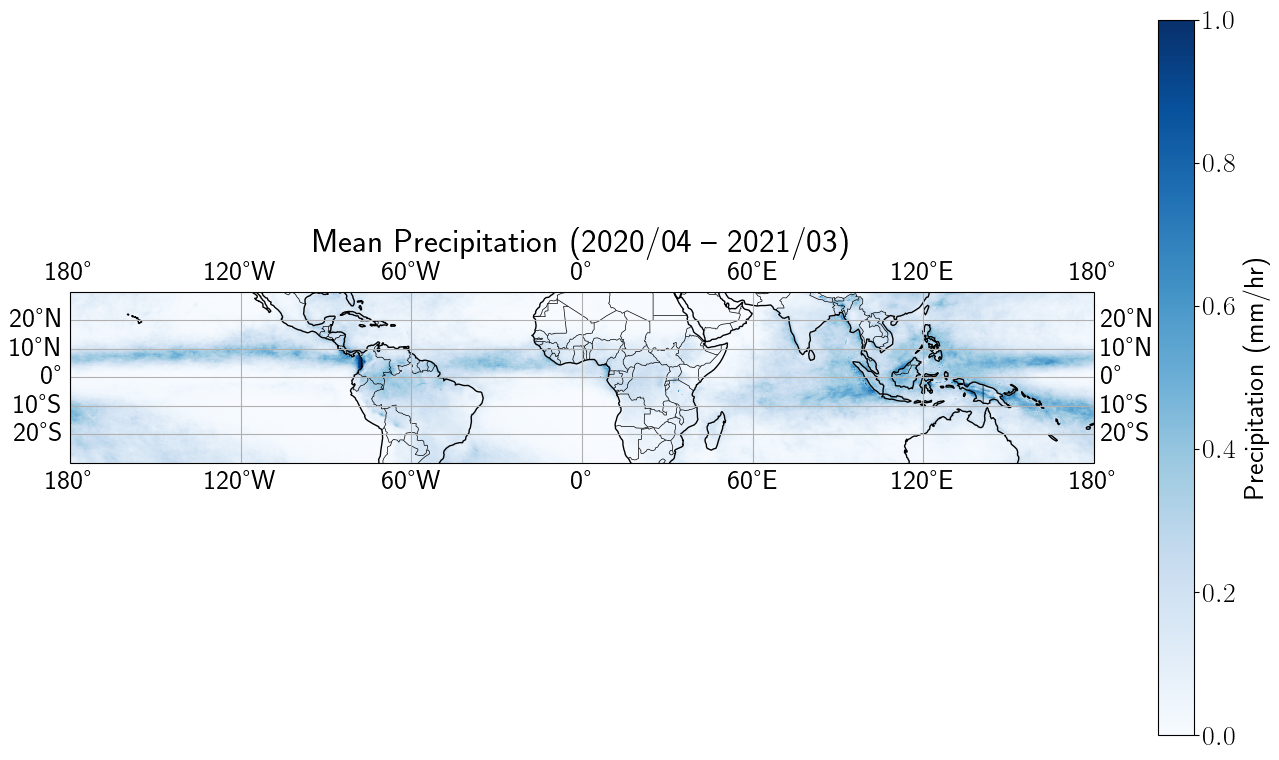

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams.update({"text.usetex": True, "font.size": 20})

# Create the plot with PlateCarree projection
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set desired vmin and vmax
vmin = 0
vmax = 1.0  # Change as appropriate for your dataset

# Plot using correct orientation and shading
p = ax.pcolormesh(mean_precip['lon'], mean_precip['lat'], mean_precip.T,
                  transform=ccrs.PlateCarree(),
                  cmap='Blues', shading='auto',
                  vmin=vmin, vmax=vmax)

# Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
ax.gridlines(draw_labels=True)

# Colorbar and title
cb = plt.colorbar(p, ax=ax, orientation='vertical', label='Precipitation (mm/hr)')
ax.set_title(r'Mean Precipitation (2020/04 -- 2021/03)')

plt.tight_layout()
plt.show()


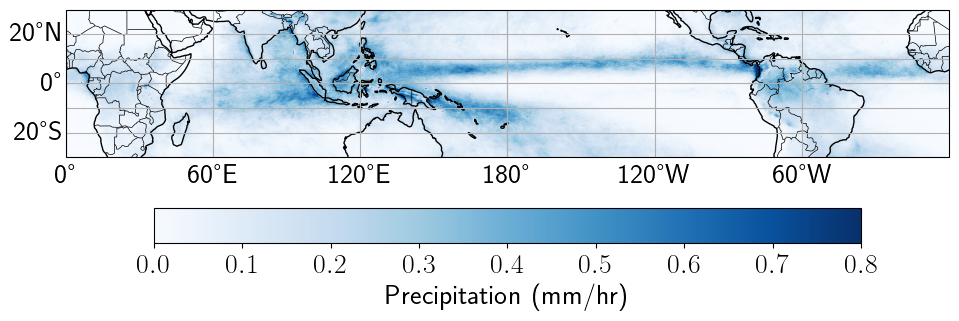

In [41]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams.update({"text.usetex": True, "font.size": 20})

# Create projection centered on 180°
projection = ccrs.PlateCarree(central_longitude=180)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Set vmin and vmax
vmin = 0
vmax = 0.8

# Plot data
p = ax.pcolormesh(mean_precip['lon'], mean_precip['lat'], mean_precip.T,
                  transform=ccrs.PlateCarree(),
                  cmap='Blues', shading='auto',
                  vmin=vmin, vmax=vmax)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)

# Add gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Add horizontal colorbar
cb = plt.colorbar(p, ax=ax, orientation='horizontal', pad=0.1, shrink=0.8)
cb.set_label(r'Precipitation (mm/hr)')

# Title
#ax.set_title(r'Mean Precipitation (2020/04 -- 2021/03)')

plt.tight_layout()
plt.show()

